<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Computer_Vision_Nanodegree_Module_1_1_2_Convolutional_Filters_and_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # used to manipulate tensor data (like matrices)

import matplotlib.image as mpimg # can be used to read and manipulate images
# (will read in RGB format)

import matplotlib.pyplot as plt # used to make plots

%matplotlib inline 

import cv2 # computer vision library (reads images in BGR format)

# *1.2 Convolutional Filters and Edge Detection*

---


# 1. Fourier Transforms


In [14]:
# to load data from google drive, we can use this command set

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# path where images are stored

image_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_2_Convolutional_Filters_Edge_Detection/images'

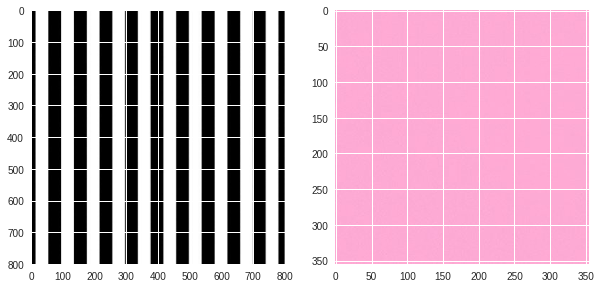

In [5]:
# viewing the RGB images

import os

# reading the image of stripes -> this is supposed to have high frequency 
# content in the horizontal direction

stripes = cv2.imread(os.path.join(image_directory,'stripes.jpg'))
stripes_1 = np.copy(stripes)
stripes_1 = cv2.cvtColor(stripes_1, cv2.COLOR_BGR2RGB)

# reading the image of a pink solid

pink_solid = cv2.imread(os.path.join(image_directory,'pink_solid.jpg'))
pink_solid_1 = np.copy(pink_solid)
pink_solid_1 = cv2.cvtColor(pink_solid_1, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.imshow(stripes_1)
ax2.imshow(pink_solid_1)

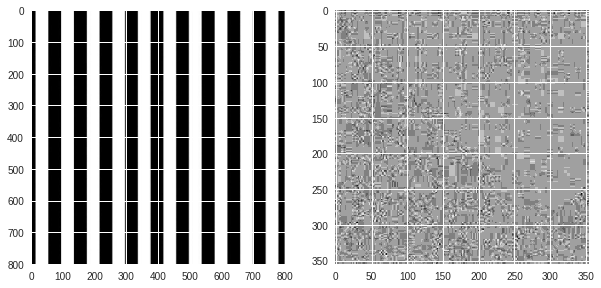

In [25]:
# converting both images to gray scale in order to perform fourier transform

stripes_gray = cv2.cvtColor(stripes_1, cv2.COLOR_RGB2GRAY)
pink_solid_gray = cv2.cvtColor(pink_solid_1, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.imshow(stripes_gray, cmap = 'gray')
ax2.imshow(pink_solid_gray, cmap = 'gray')

In [26]:
# normalizing the images and converting from uint8 to float64

print(type(stripes_gray), type(pink_solid_gray))

# image.dtype -> returns the datatype of the image (eg: uint8)

print(stripes_gray.dtype, pink_solid_gray.dtype)
stripes_gray = stripes_gray/255.0
pink_solid_gray = pink_solid_gray/255.0
print(type(stripes_gray), type(pink_solid_gray))
print(stripes_gray.dtype, pink_solid_gray.dtype)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
uint8 uint8
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
float64 float64


In [0]:
def fourier_image(normalized_image): 
  
  '''this function will return a scaled fourier transform of the normalized
  input image'''
  
  # np.fft.fft2(image) -> returns the fourier transform of the image
  
  freq = np.fft.fft2(normalized_image)
  
  # np.fft.fftshift(fourier_transformed_image) -> returns a shifted fourier 
  # transformed image such that the dc component is in the center (instead of 
  # being in the top left corner)
  
  freq_shifted = np.fft.fftshift(freq)
  
  # we are only concerned with the magnitude spectrum which can be found using
  # abs(value)
  
  # this then needs to be scaled to a log scale otherwise the higher frequencies
  # wont be visible properly
  
  magnitude_spectrum = 20*np.log(np.abs(freq_shifted))
  return magnitude_spectrum

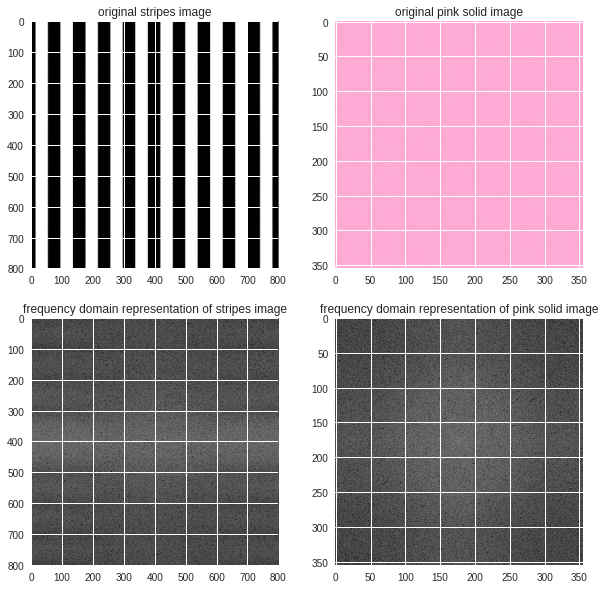

In [41]:
fft_stripes = fourier_image(stripes_gray)
fft_pink_solid = fourier_image(pink_solid_gray)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))

ax1.set_title('original stripes image')
ax1.imshow(stripes_1)
ax3.set_title('frequency domain representation of stripes image')
ax3.imshow(fft_stripes, cmap = 'gray')

ax2.set_title('original pink solid image')
ax2.imshow(pink_solid_1)
ax4.set_title('frequency domain representation of pink solid image')
ax4.imshow(fft_pink_solid, cmap = 'gray')

# comments -> it can be seen that for the stipes image their is a lot of 
# freqeuncy content going horizontally whereas for the pink solid image there is
# only one bright spot in the center indicating a high presence of low frequency 

# 2. Finding Edges and Custom Kernels


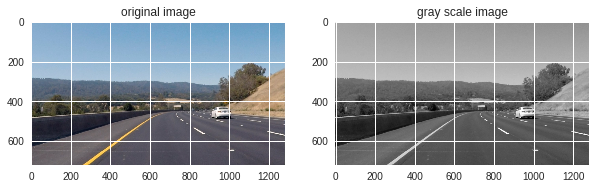

In [44]:
# lane image

lane = cv2.imread(os.path.join(image_directory, 'curved_lane.jpg'))

lane_1 = np.copy(lane)
lane_1 = cv2.cvtColor(lane_1, cv2.COLOR_BGR2RGB)

lane_gray = cv2.cvtColor(lane_1, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))

ax1.set_title('original image')
ax1.imshow(lane_1)
ax2.set_title('gray scale image')
ax2.imshow(lane_gray, cmap = 'gray')

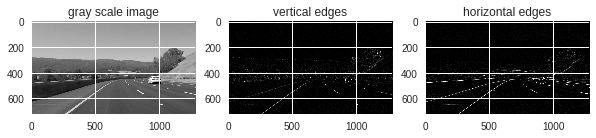

In [55]:
# custom kernel 
# 2D matrix 

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# cv2.filter2D(image, -1, filter) -> returns an output image with the filter
# applied on the input image, the '-1' implies that the output will be the 
# same size as the input image

edged_vertical = cv2.filter2D(lane_gray, -1, sobel_x)
edged_horizontal = cv2.filter2D(lane_gray, -1, sobel_y)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))

ax1.set_title('gray scale image')
ax1.imshow(lane_gray, cmap = 'gray')
ax2.set_title('vertical edges')
ax2.imshow(edged_vertical, cmap = 'gray')
ax3.set_title('horizontal edges')
ax3.imshow(edged_horizontal, cmap = 'gray')

# 3. Gaussian Blur

In [0]:
# averaging filter

avg = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])
avg = (1/9) * avg

# gaussian blur 
# in practice, we can generally use cv2's built-in gaussian blur function 
# which we shall see later

gauss = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])
gauss = (1/16) * gauss

(512, 512, 3)
uint8
<class 'numpy.ndarray'>


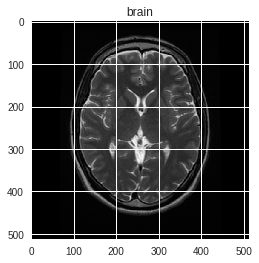

In [71]:
# reading brain image and converting it to gray scale

brain_image = cv2.imread(os.path.join(image_directory, 'brain_MR.jpg'))

print(brain_image.shape)
print(brain_image.dtype)
print(type(brain_image))

brain = np.copy(brain_image)
brain = cv2.cvtColor(brain, cv2.COLOR_RGB2BGR)

brain_gray = cv2.cvtColor(brain, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.title('brain')
plt.imshow(brain_gray, cmap = 'gray')

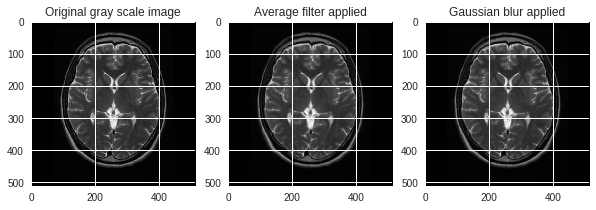

In [72]:
# applying the created filters

avg_brain = cv2.filter2D(brain_gray, -1, avg)

gauss_brain = cv2.filter2D(brain_gray, -1, gauss)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))

ax1.set_title('Original gray scale image')
ax2.set_title('Average filter applied')
ax3.set_title('Gaussian blur applied')

ax1.imshow(brain_gray, cmap = 'gray')
ax2.imshow(avg_brain, cmap = 'gray')
ax3.imshow(gauss_brain, cmap = 'gray')

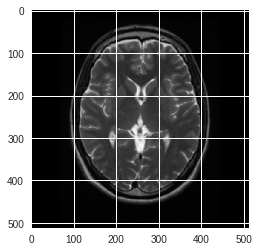

In [75]:
# using cv2's built-in gaussian blur filter

# cv2.GaussianBlur(image, filter_size_in_tuple, standard deviation) -> gaussian
# blur
# the standard deviation represents the width of the gaussian blur
# if we set a value of zero for the st dev, the filter will automatically
# select the appropriate value

gauss_brain_cv2 = cv2.GaussianBlur(brain_gray, (5, 5), 0)

plt.imshow(gauss_brain_cv2, cmap = 'gray')

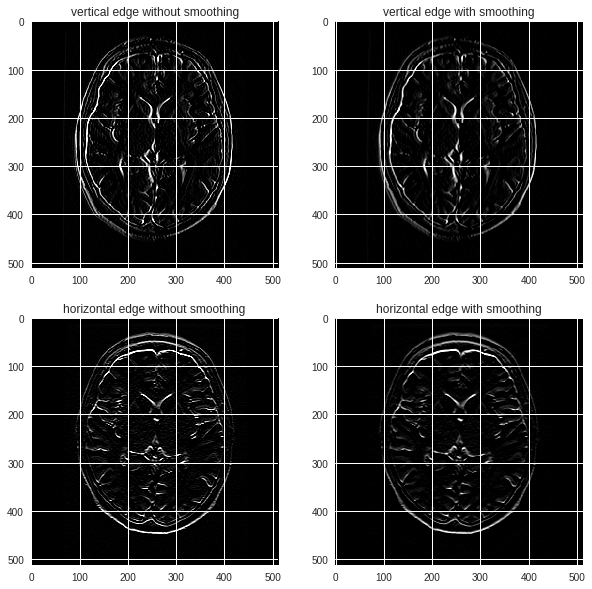

In [81]:
# observing edge detection with and without smoothing

edged_vertical_with_smoothing = cv2.filter2D(gauss_brain_cv2, -1, sobel_x)
edged_horizontal_with_smoothing = cv2.filter2D(gauss_brain_cv2, -1, sobel_y)

edged_vertical_without_smoothing = cv2.filter2D(brain_gray, -1, sobel_x)
edged_horizontal_without_smoothing = cv2.filter2D(brain_gray, -1, sobel_y)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))

ax1.set_title('vertical edge without smoothing')
ax2.set_title('vertical edge with smoothing')
ax3.set_title('horizontal edge without smoothing')
ax4.set_title('horizontal edge with smoothing')

ax1.imshow(edged_vertical_without_smoothing, cmap = 'gray')
ax2.imshow(edged_vertical_with_smoothing, cmap = 'gray')
ax3.imshow(edged_horizontal_without_smoothing, cmap = 'gray')
ax4.imshow(edged_horizontal_with_smoothing, cmap = 'gray')

uint8
50.0


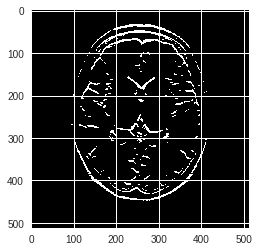

In [88]:
# edge thresholding

# cv2.threshold(image, threshold, new_value_of_pixels_above_threshold, 
# cv2.THRESH_BINARY) -> creates a binary image setting any value less than
# threshold to zero and any value above it to the 
# new_value_of_pixels_above_threshold; at the same time it also returns the 
# threshold value i.e. the order of return values is: (threshold, thresholded 
# image)

thresh, binarized_edge = cv2.threshold(edged_horizontal_with_smoothing, 50, 255, cv2.THRESH_BINARY)

print(binarized_edge.dtype)
print(thresh)

plt.imshow(binarized_edge, cmap = 'gray')

# 4. Frequency Representation of Filters


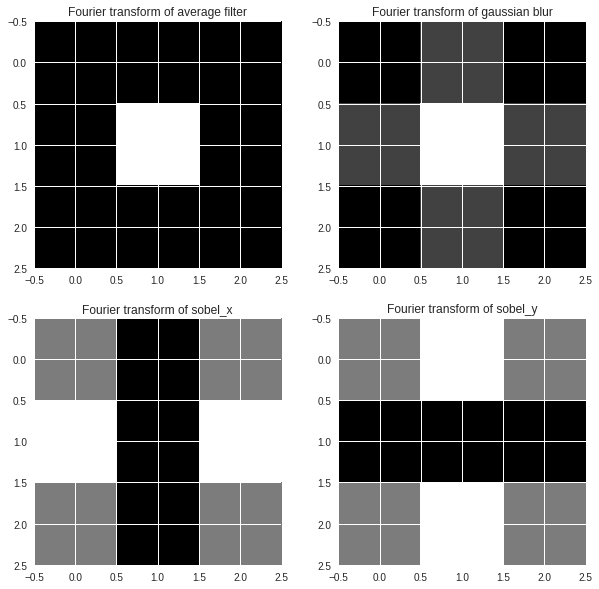

In [101]:
filters = [avg, gauss, sobel_x, sobel_y]

filters_magnitude = []

for i in filters:
  freq = np.fft.fft2(i)
  freq_shifted = np.fft.fftshift(freq)
  magnitude_spectrum = np.log(np.abs(freq_shifted)+1)
  filters_magnitude.append(magnitude_spectrum)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))

ax1.set_title('Fourier transform of average filter')
ax2.set_title('Fourier transform of gaussian blur')
ax3.set_title('Fourier transform of sobel_x')
ax4.set_title('Fourier transform of sobel_y')

ax1.imshow(filters_magnitude[0], cmap = 'gray')
ax2.imshow(filters_magnitude[1], cmap = 'gray')
ax3.imshow(filters_magnitude[2], cmap = 'gray')
ax4.imshow(filters_magnitude[3], cmap = 'gray')

# 5. Canny Edge Detection


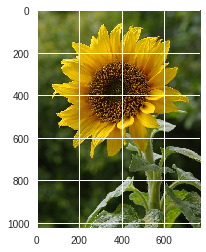

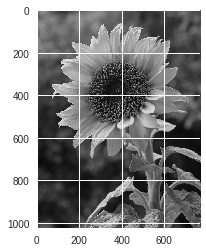

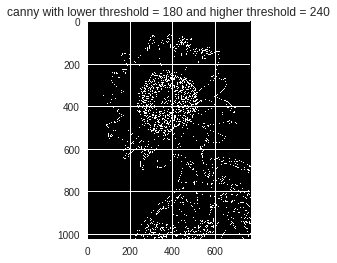

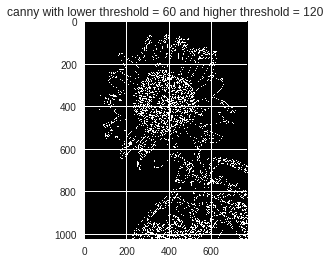

In [13]:
# sunfolower

flower = cv2.imread(os.path.join(image_directory, 'sunflower.jpg'))

flower_1 = np.copy(flower)
flower_1 = cv2.cvtColor(flower_1, cv2.COLOR_BGR2RGB)
plt.imshow(flower_1)

flower_gray = cv2.cvtColor(flower_1, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(flower_gray, cmap = 'gray')

# cv2.Canny(image, lower_threshold, higher_threshold) -> returns edged image

canny_1 = cv2.Canny(flower_gray, 150, 200)
canny_2 = cv2.Canny(flower_gray, 60, 120)

plt.figure()
plt.title('canny with lower threshold = 180 and higher threshold = 240')
plt.imshow(canny_1, cmap = 'gray')

plt.figure()
plt.title('canny with lower threshold = 60 and higher threshold = 120')
plt.imshow(canny_2, cmap = 'gray')

# comments: a lower lower_threshold will generally imply more noise whereas a 
# higher lower_threshold might lead us to miss edges

# 6. Hough Lines (I)

(6, 1, 4)
[[303 369 345 152]]


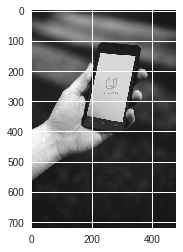

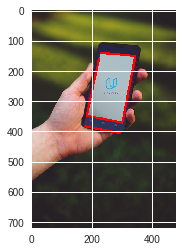

In [31]:
# phone image on which lines are to be detected

phone = cv2.imread(os.path.join(image_directory, 'phone.jpg'))

phone_1 = np.copy(phone)
phone_1 = cv2.cvtColor(phone_1, cv2.COLOR_BGR2RGB)

gray_phone = cv2.cvtColor(phone_1, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_phone, cmap = 'gray')

edge = cv2.Canny(gray_phone, 50, 100)

plt.figure()
plt.imshow(edge, cmap = 'gray')

# probabilistic hough transform

# resolution of hough space (rho, thetha)

# 1 pixel

rho = 1

# 1 degree

theta = np.pi/180

# minimum line length in pixels

min_line_length = 100

# maximum allowable gap between pixels

max_line_gap = 5

# minimum number of hough space intersections to call it a line

threshold = 60

phone_lines = np.copy(phone)
phone_lines = cv2.cvtColor(phone_lines, cv2.COLOR_BGR2RGB)

# cv2.HoughLinesP(edge image, rho, thetha, threshold, np.array([]),
# min_line_length, max_line_gap) -> returns a 'k x 1 x 4' tensor where 
# k is the number of lines detected, '1 x 4' is a tuple consisting of (x1, y1, 
# x2, y2) for each line; these are found using a probabilistic hough transform

lines= cv2.HoughLinesP(edge, rho, theta, threshold, 
                      np.array([]), min_line_length,
                      max_line_gap)

# shape of lines (k x 1 x 4)

print(lines.shape)

# printing the first element containing (x1, y1, x2, y2)

print(lines[0])

# cv2.line(image, (x1, y1), (x2, y2), (R, G, B), line_thickness) -> draws a
# line on the image having end points (x1, y1) and (x2, y2)
# note: if the image was BGR. it would have been (B, G, R) instead of (R, G, B)

# drawing lines on the image

for line in lines:
  for x1, y1, x2, y2 in line:
    cv2.line(phone_lines, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
plt.imshow(phone_lines)


# 7. Hough Circles (II)

(1, 148, 3)
float32
uint16
[474  96  24]


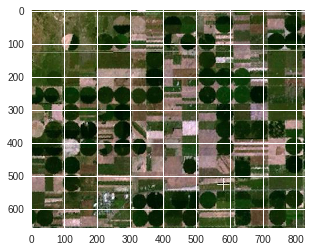

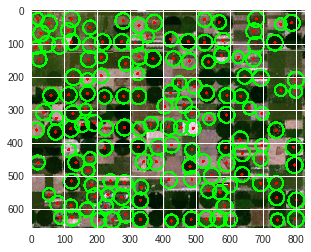

In [78]:
# reading image containing round farms

round_farms = cv2.imread(os.path.join(image_directory, 'round_farms.jpg'))

farms = np.copy(round_farms)
farms = cv2.cvtColor(farms, cv2.COLOR_BGR2RGB)

plt.imshow(farms)

farms_gray = cv2.cvtColor(farms, cv2.COLOR_RGB2GRAY)

# hough transform for circle detection

# input image -> gray scale (not edged as was used in HoughLinesP)

input_image = farms_gray

# detection method -> the only detection method available is cv2.HOUGH_GRADIENT

detection_method = cv2.HOUGH_GRADIENT

# resolution defines the dimensions of the hough space (accumulator resolution)
# compared to original image; for resolution = 1, the accumulator will be same
# size as that of the original image, if resolution = 2, the accumulator will be
# half the size as that of the original image

resolution = 1

# minDist defines the distance between the center of two circles (otherwise many
# false positives will be detected

minimum_distance = 35

# param1 is used as the high threshold for canny edge detection 

param_1 = 70

# param2 is used as the low threshold for canny edge detection

param_2 = 11

# minRadius is used as the minimum circle radius

min_radius = 17

# maxRadius is used as the maximum circle radius

max_radius = 25

# cv2.HoughCircles(gray scale image, detection method, resolution, minDist, 
# param1, param2, minRadius, maxRadius) -> returns a '1 x k x 3' tensor where 
# k is the number of circles detected, each detected circle is stored as a tuple
# consisting of (x, y, r) where (x, y) is the circle center and 'r' is the 
# radius; these are found using a Hough Gradient method because otherwise we 
# would have a 3D parametric space which would be extremely time consuming to
# explore

circles = cv2.HoughCircles(input_image, detection_method, resolution,
                           minDist= minimum_distance,
                           param1 = param_1, param2 = param_2,
                           minRadius = min_radius, maxRadius = max_radius)

# shape of circles (1 x k x 3)

print(circles.shape)

# type of circles -> float

print(circles.dtype)

# converting from float to uint16

# np.around(array) -> returns a new array with each element rounded off to the
# nearest integer

# np.uint16(np_array) -> returns a new array of the type uint16

circles = np.uint16(np.around(circles))
print(circles.dtype)

# printing the first element containing (x, y, r)

print(circles[0,0,:])

# copying the original image on which to draw the circles

farms_circle = np.copy(farms)

# cv2.circle(image, (x, y), r, (R, G, B), circle_thickness) -> draws a
# circle on the image centered on the point (x, y) and having radius 'r'
# note: if the image was BGR. it would have been (B, G, R) instead of (R, G, B)

# for i in circles implies that we have entered the multidimensional array
# for j in i implies (x_j, y_j, r_j) 

for i in circles:
  for j in i:
    
    # drawing outer circle
    
    cv2.circle(farms_circle, (j[0], j[1]), j[2], (0, 255, 0), 5)
    
    # drawing center of circle
    
    cv2.circle(farms_circle, (j[0], j[1]), 2, (255, 0, 0), 5)
    
plt.figure()
plt.imshow(farms_circle)

# 8. Haar Cascade, Face Detection

(16, 4)
[1156  137   83   83]
(1526, 1800, 3)


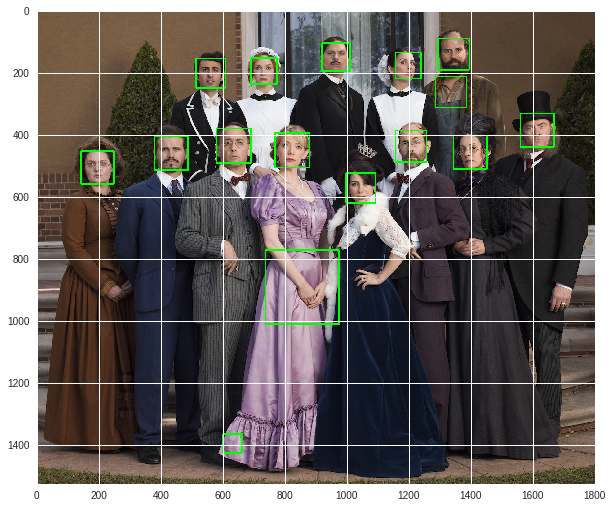

In [97]:
# image containing many faces

faces = cv2.imread(os.path.join(image_directory, 'multi_faces.jpg'))

faces_1 = np.copy(faces)
faces_1 = cv2.cvtColor(faces_1, cv2.COLOR_BGR2RGB)

# converting to gray scale

faces_gray = cv2.cvtColor(faces_1, cv2.COLOR_RGB2GRAY)

# directory to where the haar cascades are stored in xml formal 

detector_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_2_Convolutional_Filters_Edge_Detection/detector_architectures'

# cv2.CascadeClassifier(classifier_path); reading the face detector and 
# creating a classifier object

cascade = cv2.CascadeClassifier(os.path.join(detector_directory, 'haarcascade_frontalface_default.xml'))

# cascade.detectMultiScale(gray_scale_image, scaleFactor, minNeighbors) ->
# returns a 'k x 4' 2D array with k being the number of detections, and each
# detection consisting of a rectangle stored as (x, y, w, h) i.e. left_most 
# pixel (x, y) and width and height of rectangle (w, h); scaleFactor decides as 
# to how much the size of the image should reduce at each image scale whereas 
# minNeighbors define the number of neighbors each candidate rectangle should
# have in order to retain it

haar_faces = cascade.detectMultiScale(faces_gray, 1.1, 10)

# shape of haar cascade

print(haar_faces.shape)

# printing first element -> (x1, y1, w1, h1)

print(haar_faces[0])

# creating a canvas on which to draw the rectangles

detected_faces = np.copy(faces)
print(detected_faces.shape)
detected_faces = cv2.cvtColor(detected_faces, cv2.COLOR_BGR2RGB)

# cv2.rectangle(image, (x1, y1), (x2, y2), (R, G, B), rectangle_thickness) -> 
# draws a rectangle on the image starting from the top left at point (x1, y1) 
# and ending on the bottom right at point (x2, y2) 
# note: if the image was BGR. it would have been (B, G, R) instead of (R, G, B)

for i in haar_faces:
  cv2.rectangle(detected_faces, 
                (i[0], i[1]), 
                (i[0] + i[2],
                (i[1] + i[3]),
                (0, 255, 0), 4)

# showing the detected faces
                
plt.figure(figsize = (10, 20))
plt.imshow(detected_faces)